### 1、Import tensorflow and use tensorflow to define a constant.

In [1]:
import  tensorflow as tf
hello = tf.constant("Hello, TF")

### 2、Use tensorflow to print 'Welcome to Huawei'.

In [2]:
session = tf.Session()
hello = tf.constant('Welcome to Huawei')
result = session.run(hello)
print(result)
session.close()

b'Welcome to Huawei'


### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [3]:
z = tf.constant(151)
x = tf.constant(9)

result = z * x
with tf.Session() as sess:
    print(sess.run(result))
sess.close()

1359


### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [4]:
sess = tf.InteractiveSession()
A = tf.Variable(tf.random_normal([3,4],mean=1.0, stddev=1.0))
B = tf.Variable(tf.random_normal([4,3],mean=1.0, stddev=1.0))
tf.global_variables_initializer().run()

result = tf.matmul(A, B)
print(result.eval())

[[-1.1680924  5.0312347  2.1211724]
 [ 7.2730856  6.726268   7.0590773]
 [ 9.3129635  9.9884405  5.944621 ]]


### 5、Try to use your own handwriting number to do image recognition

In [5]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
learn = tf.contrib.learn 
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = input_data.read_data_sets("data\\MNIST_data\\")

Extracting data\MNIST_data\train-images-idx3-ubyte.gz
Extracting data\MNIST_data\train-labels-idx1-ubyte.gz
Extracting data\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data\MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
data = mnist.train.images 
labels = np.asarray(mnist.train.labels, dtype = np.int32) 
test_data = mnist.test.images 
test_labels = np.asarray(mnist.test.labels, dtype = np.int32) 
  
max_examples = 10000
data = data[:max_examples] 
labels = labels[:max_examples]

In [7]:
def display(i): 
    img = test_data[i] 
    plt.title('label : {}'.format(test_labels[i])) 
    plt.imshow(img.reshape((28, 28))) 

# img in tf is 28 by 28 px 
# fitting linear classifier 
feature_columns = learn.infer_real_valued_columns_from_input(data) 
classifier = learn.LinearClassifier(n_classes = 10,  
                                    feature_columns = feature_columns)
classifier.fit(data, labels, batch_size = 100, steps = 1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001F43DFCD470>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

0.9137
prediction : [6], label : 6


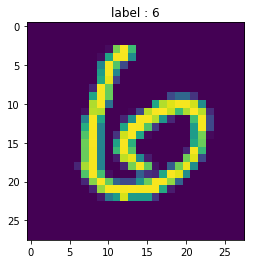

In [8]:
# Evaluate accuracy 
classifier.evaluate(test_data, test_labels) 
print(classifier.evaluate(test_data, test_labels)["accuracy"]) 
  
prediction = classifier.predict(np.array([test_data[11]],  
                                         dtype=float),  
                                         as_iterable=False) 
print("prediction : {}, label : {}".format(prediction,  
      test_labels[11]) ) 
  
if prediction == test_labels[11]: 
     display(11)